In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
data=pd.read_csv("Heart Attack.csv")

In [4]:
data.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [5]:
data.tail()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive
1318,51,1,94,157,79,134.0,50.89,1.770,positive


In [6]:
data.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1314    False
1315    False
1316    False
1317    False
1318    False
Length: 1319, dtype: bool

In [8]:
# Split the data into features and target
x=data.drop('class',axis=1)
y=data['class']

In [10]:
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(len(x_train))
print(len(x_test))

923
396


In [36]:
# Create a decision tree classifier
cl=DecisionTreeClassifier(max_depth=3,splitter="random",criterion="entropy")

In [37]:
cl.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [38]:
dot_data = export_graphviz(
    cl,
    out_file=None,
    feature_names=x.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("heart_attack.png")

True

In [39]:
y_pred=cl.predict(x_test)
print(len(y_pred))

396


In [40]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.61
Precision: 0.37
Recall: 0.61
F1 Score: 0.46


c:\Users\Dell\anaconda3\boston\envs\bia\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


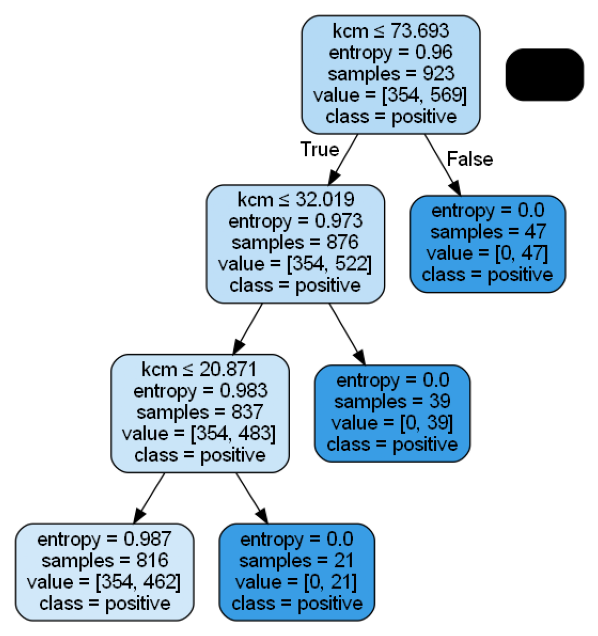

In [41]:
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("heart_attack.png"))
plt.axis('off')
plt.show()

In [47]:
# bagging
from sklearn.ensemble import RandomForestClassifier


In [48]:
rf_clf = RandomForestClassifier(n_estimators=100,criterion="entropy", random_state=42)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [49]:
rf_y_pred=rf_clf.predict(x_test)

In [50]:
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [51]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier

In [53]:
ab_clf=AdaBoostClassifier(n_estimators=50,learning_rate=1,random_state=42)
ab_clf.fit(x_train,y_train)

c:\Users\Dell\anaconda3\boston\envs\bia\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=1, random_state=42)

In [55]:
ab_y_pred=rf_clf.predict(x_test)

In [56]:
ab_accuracy = metrics.accuracy_score(y_test, ab_y_pred)
ab_precision = metrics.precision_score(y_test, ab_y_pred, average='weighted')
ab_recall = metrics.recall_score(y_test, ab_y_pred, average='weighted')
ab_f1_score = metrics.f1_score(y_test, ab_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {ab_accuracy:.2f}")
print(f"Precision: {ab_precision:.2f}")
print(f"Recall: {ab_recall:.2f}")
print(f"F1 Score: {ab_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
